In [1]:
# ALL IMPORTS

import json
import os
from collections import defaultdict

from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms
import torch

import matplotlib.pyplot as plt
import numpy as np

import cv2

In [2]:
# mount our Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# unzip images in Google Drive

!unzip '/content/drive/MyDrive/Colab Notebooks/APS360/Project/chessred2k.zip' -d '/content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K'

Archive:  /content/drive/MyDrive/Colab Notebooks/APS360/Project/chessred2k.zip
   creating: /content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K/images/
   creating: /content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K/images/0/
  inflating: /content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K/images/0/G000_IMG000.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K/images/0/G000_IMG001.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K/images/0/G000_IMG002.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K/images/0/G000_IMG003.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K/images/0/G000_IMG004.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K/images/0/G000_IMG005.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K/images/0/G000_IMG006.jpg  
  inflating:

In [3]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K'
annotation_dir = '/content/drive/MyDrive/Colab Notebooks/APS360/Project/annotations.json'

with open(annotation_dir, "r") as f:
            annotations = json.load(f)

In [71]:
# messing around with annotations.json

print(annotations.keys(), "\n")
print(annotations['categories'], "\n") # id map for each type of piece
print(annotations['splits']['train']['image_ids'])
# print(annotations['splits']['chessred2k']['train'])
# print(annotations['splits']['chessred2k']['val'])
# print(annotations['splits']['chessred2k']['test'])

# print((annotations['splits']['chessred2k']['train']['image_ids']))

# print(annotations['annotations']['pieces'][0]) # all 223,804 piece annotations for 10800 images
# print(annotations['annotations']['corners'][0])

# print(annotations['images'][0])

dict_keys(['info', 'images', 'annotations', 'categories', 'splits']) 

[{'id': 0, 'name': 'white-pawn'}, {'id': 1, 'name': 'white-rook'}, {'id': 2, 'name': 'white-knight'}, {'id': 3, 'name': 'white-bishop'}, {'id': 4, 'name': 'white-queen'}, {'id': 5, 'name': 'white-king'}, {'id': 6, 'name': 'black-pawn'}, {'id': 7, 'name': 'black-rook'}, {'id': 8, 'name': 'black-knight'}, {'id': 9, 'name': 'black-bishop'}, {'id': 10, 'name': 'black-queen'}, {'id': 11, 'name': 'black-king'}, {'id': 12, 'name': 'empty'}] 

[257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354

In [4]:
# IMPORTANT

image_id_to_path = {img['id']: os.path.join(data_dir, img['path']) for img in annotations['images']}
print(image_id_to_path)

image_to_pieces = defaultdict(list)
for ann in annotations['annotations']['pieces']:
    image_to_pieces[ann['image_id']].append(ann)
print(image_to_pieces[0])

print(image_id_to_path[103])

print(image_to_pieces[8000])

{0: '/content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K/images/0/G000_IMG000.jpg', 1: '/content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K/images/0/G000_IMG001.jpg', 2: '/content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K/images/0/G000_IMG002.jpg', 3: '/content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K/images/0/G000_IMG003.jpg', 4: '/content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K/images/0/G000_IMG004.jpg', 5: '/content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K/images/0/G000_IMG005.jpg', 6: '/content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K/images/0/G000_IMG006.jpg', 7: '/content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K/images/0/G000_IMG007.jpg', 8: '/content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K/images/0/G000_IMG008.jpg', 9: '/content/drive/MyDrive/Colab Notebooks/APS360/Project/ChessReD2K/images/0/G000_IMG009.jpg', 10: '/content/drive/MyDrive/Colab Noteb

In [59]:
# IMPORTANT
# uppercase is white, lowercase is black
id_to_piece = {
    0: 'P', 1: 'R', 2: 'N', 3: 'B', 4: 'Q', 5: 'K',
    6: 'p', 7: 'r', 8: 'n', 9: 'b', 10: 'q', 11: 'k',
    12: '1'  # empty
}

piece_to_label = {
    'P': 0, 'R': 1, 'N': 2, 'B': 3, 'Q': 4, 'K': 5,
    'p': 6, 'r': 7, 'n': 8, 'b': 9, 'q': 10, 'k': 11
}

def fen_to_label_vector(fen):
    squares = []
    for row in fen.split('/'):
        for ch in row:
            if ch.isdigit():
                # squares.extend([12] * int(ch))  # 12 = empty
                squares.append(12)
            else:
                squares.append(piece_to_label[ch])
    return torch.tensor(squares, dtype=torch.long)  # shape: (64,)

# convert image piece list to FEN
def pieces_to_fen(piece_list):
    board = [['1'] * 8 for _ in range(8)]
    pos_to_index = lambda pos: (8 - int(pos[1]), ord(pos[0]) - ord('a'))

    for piece in piece_list:
        row, col = pos_to_index(piece['chessboard_position'])
        board[row][col] = id_to_piece[piece['category_id']]

    fen_rows = []
    for row in board:
        fen_row = ''
        count = 0
        for cell in row:
            if cell == '1':
                fen_row += '0'
            else:
                fen_row += cell
        fen_rows.append(fen_row)

    return '/'.join(fen_rows)

print(pieces_to_fen(image_to_pieces[2384]))
print(fen_to_label_vector(pieces_to_fen(image_to_pieces[10])))
print(fen_to_label_vector(pieces_to_fen(image_to_pieces[10])).shape)

rnbqkbnr/pppppppp/00000000/00000000/00P00000/00000000/PP0PPPPP/RNBQKBNR
tensor([ 7, 12, 12, 10, 11,  9, 12,  7,  6,  6,  6,  8, 12,  6,  6,  6, 12, 12,
        12, 12,  6,  8, 12, 12, 12, 12, 12,  6, 12,  9, 12, 12, 12,  0, 12, 12,
        12, 12, 12, 12,  0, 12, 12, 12,  0,  2, 12, 12, 12,  3,  0,  0, 12,  0,
         0,  0,  1,  2, 12,  4,  5,  3, 12,  1])
torch.Size([64])


In [6]:
# NOT IMPORTANT

data_transform = transforms.Compose([
      transforms.Resize((224,224)),
      transforms.ToTensor(),
      ])


# dataset class to be used by DataLoader. Needs init, len, getitem functions
class ChessFENDataset(Dataset):
    def __init__(self, image_ids, image_to_pieces, image_id_to_path, transform=None):
        self.image_ids = image_ids
        self.image_to_pieces = image_to_pieces
        self.image_id_to_path = image_id_to_path
        self.transform = transform or transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor()
        ])

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        image_path = self.image_id_to_path[image_id]
        image = Image.open(image_path).convert("RGB")
        image = self.transform(image)

        piece_list = self.image_to_pieces[image_id]
        fen = pieces_to_fen(piece_list)
        label = fen_to_label_vector(fen)
        return image, label


In [62]:
# NOT IMPORTANT, JUST FOR GETTING SOME NUMBERS

train_ids = annotations['splits']['chessred2k']['train']['image_ids']
train_dataset = ChessFENDataset(train_ids, image_to_pieces, image_id_to_path)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

print(f"ChessReD2K Training Images: {len(train_dataset)}")

val_ids = annotations['splits']['chessred2k']['val']['image_ids']
val_dataset = ChessFENDataset(val_ids, image_to_pieces, image_id_to_path)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=True)

print(f"ChessReD2K Validation Images: {len(val_dataset)}")

test_ids = annotations['splits']['chessred2k']['test']['image_ids']
test_dataset = ChessFENDataset(test_ids, image_to_pieces, image_id_to_path)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

print(f"ChessReD2K Testing Images: {len(test_dataset)}")


ChessReD2K Training Images: 1442
ChessReD2K Validation Images: 330
ChessReD2K Testing Images: 306


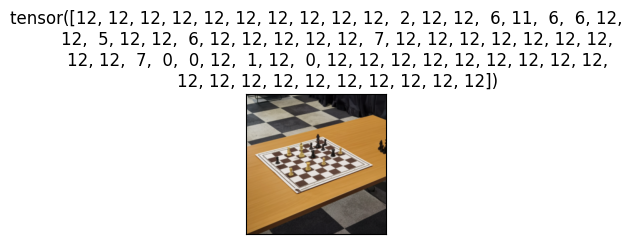

In [64]:
# NOT IMPORTANT

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(1):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    img = images[idx]
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.title(labels[idx])

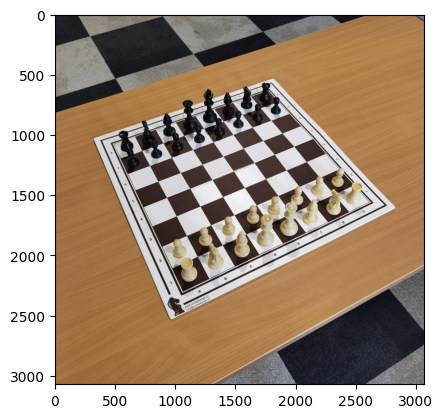

In [61]:
#NOT IMPORTANT

import matplotlib.image as mpimg
img = mpimg.imread(image_id_to_path[0])
fig, ax = plt.subplots()
ax.imshow(img)
plt.show()


In [7]:
# VERY IMPORTANT, PREPROCESSING OF BOARD TO GET OVERHEAD IMG

import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_board_corners(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # edge detection
    edges = cv2.Canny(blur, 50, 150)

    # close gaps in lines
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    dilated = cv2.dilate(edges, kernel, iterations=2)

    # find contours
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    image_area = img.shape[0] * img.shape[1]

    for cnt in contours:
        epsilon = 0.02 * cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, epsilon, True)
        area = cv2.contourArea(approx)

        # take large contour (hopefully, the board)
        if len(approx) == 4 and area > image_area * 0.05:
            return np.float32([pt[0] for pt in approx]), dilated

    return None, dilated

def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]     # Top-left
    rect[2] = pts[np.argmax(s)]     # Bottom-right
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]  # Top-right
    rect[3] = pts[np.argmax(diff)]  # Bottom-left
    return rect

def draw_corners(img, corners):
    img_copy = img.copy()
    labels = ["Top-Left", "Top-Right", "Bottom-Right", "Bottom-Left"]
    ordered = order_points(corners)

    for i, pt in enumerate(ordered):
        pt_int = tuple(np.int32(pt))
        cv2.circle(img_copy, pt_int, 10, (0, 0, 255), -1)
        cv2.putText(img_copy, labels[i], (pt_int[0] + 5, pt_int[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

    for i in range(4):
        pt1 = tuple(np.int32(ordered[i]))
        pt2 = tuple(np.int32(ordered[(i + 1) % 4]))
        cv2.line(img_copy, pt1, pt2, (0, 255, 0), 2)

    return img_copy


def warp_board(img, corners, output_size=400):
    src_pts = order_points(corners)
    dst_pts = np.array([
        [0, 0],
        [output_size-1, 0],
        [output_size-1, output_size-1],
        [0, output_size-1]
    ], dtype="float32")

    M = cv2.getPerspectiveTransform(src_pts, dst_pts)
    warped = cv2.warpPerspective(img, M, (output_size, output_size))
    return warped

def slice_squares(warped, square_size=50):
    squares = []
    for row in range(8):
        for col in range(8):
            x1 = col * square_size
            y1 = row * square_size
            square = warped[y1:y1 + square_size, x1:x1 + square_size]
            squares.append(square)
    return squares

def preprocess_chessboard(image_path, output_size=400, display=True):
    img = cv2.imread(image_path)
    corners, debug_dilated = detect_board_corners(img)

    if corners is None:
        return
        raise ValueError("Board corners could not be detected.")

    corner_overlay = draw_corners(img, corners)
    warped = warp_board(img, corners, output_size)
    squares = slice_squares(warped, square_size=output_size // 8)

    if display:
        titles = ["Original", "Dilated Edges", "Corner Overlay", "Warped Top-Down"]
        images = [img, debug_dilated, corner_overlay, warped]

        plt.figure(figsize=(60, 20))
        for i in range(4):
            plt.subplot(1, 4, i + 1)
            img_disp = images[i]
            if len(img_disp.shape) == 2:
                plt.imshow(img_disp, cmap='gray')
            else:
                img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)
                plt.imshow(img_disp)
            plt.title(titles[i])
            plt.axis('off')
        plt.tight_layout()
        plt.show()

    return warped, squares


In [15]:
# VERY IMPORTANT, SAVE WARPED CHESSRES2K IMAGES to DRIVE

import os
from google.colab import drive

# Create save directory if it doesn't exist
save_dir = "/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2"
os.makedirs(save_dir, exist_ok=True)

X = []  # Paths to warped images
y = []  # Labels (4 FEN rotations each)

valid_ids = []
error_ids = []
invalid_warp_ids = []

train_chessred2k_ids = annotations['splits']['chessred2k']['train']['image_ids']

for i in train_chessred2k_ids:
    path = image_id_to_path.get(i)
    if path is None:
        error_ids.append(i)
        continue

    try:
        warped, _ = preprocess_chessboard(path, display=False)
        if warped is None or np.std(warped) < 50:
            invalid_warp_ids.append(i)
            continue

        # Save warped image
        img_save_path = os.path.join(save_dir, f"{i}.png")
        cv2.imwrite(img_save_path, warped)

        # Get 4 FEN rotations
        pieces = image_to_pieces[i]
        fen = pieces_to_fen(pieces)
        # fen0 = fen
        # fen90 = rotate_fen_90(fen)
        # fen180 = rotate_fen_180(fen)
        # fen270 = rotate_fen_270(fen)

        # label = [
        #     fen_to_label_vector(fen0),
        #     fen_to_label_vector(fen90),
        #     fen_to_label_vector(fen180),
        #     fen_to_label_vector(fen270)
        # ]

        X.append(img_save_path)
        y.append(fen)
        valid_ids.append(i)

    except Exception as e:
        error_ids.append(i)

with open("/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped_dataset.pkl", "wb") as f:
  pickle.dump((X, y), f)

print("✅ Total valid images:", len(valid_ids))
print("❌ Total errors:", len(error_ids))
print("⚠️ Total invalid warped:", len(invalid_warp_ids))


✅ Total valid images: 720
❌ Total errors: 227
⚠️ Total invalid warped: 495


In [16]:
# USED TO CONVERT IMAGES, LABELS TO DATASET

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class ChessboardDataset(Dataset):
    def __init__(self, image_paths, fen_labels, transform=None):
        self.image_paths = image_paths
        self.fen_labels = fen_labels
        self.transform = transform or transforms.ToTensor()

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        fen = self.fen_labels[idx]

        # Load and transform image
        image = Image.open(img_path).convert('RGB')
        image_tensor = self.transform(image)

        # Convert FEN string to label tensor (shape: [64])
        label_tensor = fen_to_label_vector(fen)

        return image_tensor, label_tensor

In [17]:
# OPEN IMAGES, LABELS from DRIVE (SAVED IN CELLS 2 ABOVE)

import pickle

with open("/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped_dataset.pkl", 'rb') as f:
    X_loaded, y_loaded = pickle.load(f)
print(X_loaded)
print(y_loaded)
data_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Recreate Dataset and DataLoader
dataset = ChessboardDataset(X_loaded, y_loaded, transform=data_transform)
loader = DataLoader(dataset, batch_size=16, shuffle=True)


['/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2/2383.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2/2384.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2/2385.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2/2388.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2/2391.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2/2394.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2/2397.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2/2398.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2/2402.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2/2403.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2/2406.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2/2412.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2/2415.png', '/content/drive/MyDrive/Colab Noteboo

In [19]:
# MODEL

import torch
import torch.nn as nn
import torchvision.models as models

class ChessPieceClassifier(nn.Module):
    def __init__(self, num_classes=12):
        super(ChessPieceClassifier, self).__init__()
        resnet = models.resnet18(pretrained=True)

        # Remove ResNet classification head
        self.features = nn.Sequential(*list(resnet.children())[:-2])  # Output: (512, 8, 8)

        self.head = nn.Sequential(
            nn.Conv2d(512, 128, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(128, 13, kernel_size=1)  # 13 classes including empty
        )



    def forward(self, x):
        x = self.features(x)
        x = self.head(x)  # (B, 12, 8, 8)
        x = x.permute(0, 2, 3, 1).reshape(x.size(0), 64, 13)
        return x

import torch.optim as optim
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ChessPieceClassifier(num_classes=13)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [23]:
model2 = ChessPieceClassifier(num_classes=13)

In [27]:
model_overfit = ChessPieceClassifier(num_classes=13).to(device)
optimizer = torch.optim.Adam(model_overfit.parameters(), lr=1e-4)
criterion = torch.nn.CrossEntropyLoss(ignore_index=12)

# Get one batch from your dataloader
images, labels = next(iter(loader))

images = images.to(device)
labels = labels.long().to(device)

model_overfit.train()

print("Starting overfit test on single batch")

for i in range(100):  # train 100 iterations on same batch
    optimizer.zero_grad()
    outputs = model_overfit(images)  # (B, 64, 13)

    loss = criterion(outputs.reshape(-1, 13), labels.reshape(-1))
    loss.backward()
    optimizer.step()

    if (i+1) % 10 == 0:
        print(f"Iter {i+1:03d}: Loss = {loss.item():.4f}")


Starting overfit test on single batch
Iter 010: Loss = 0.7559
Iter 020: Loss = 0.2216
Iter 030: Loss = 0.0560
Iter 040: Loss = 0.0186
Iter 050: Loss = 0.0091
Iter 060: Loss = 0.0057
Iter 070: Loss = 0.0042
Iter 080: Loss = 0.0033
Iter 090: Loss = 0.0028
Iter 100: Loss = 0.0024


In [116]:
from collections import Counter

all_labels = []
for _, labels in loader:
    for b in range(labels.shape[0]):
        all_labels.extend(labels[b].tolist())

print(Counter(all_labels))


Counter({12: 30894, 6: 3998, 0: 3788, 7: 1137, 1: 1117, 3: 787, 9: 777, 11: 720, 5: 720, 2: 703, 8: 626, 10: 414, 4: 399})


Epoch [1/15], Loss: 1.4729, Accuracy (no empty): 0.5787
✅ Saved model to /content/drive/MyDrive/Colab Notebooks/APS360/Project/models/chess_classifier_epoch1.pth
Epoch [2/15], Loss: 0.9075, Accuracy (no empty): 0.7108
✅ Saved model to /content/drive/MyDrive/Colab Notebooks/APS360/Project/models/chess_classifier_epoch2.pth
Epoch [3/15], Loss: 0.6537, Accuracy (no empty): 0.7897
✅ Saved model to /content/drive/MyDrive/Colab Notebooks/APS360/Project/models/chess_classifier_epoch3.pth
Epoch [4/15], Loss: 0.4291, Accuracy (no empty): 0.8730
✅ Saved model to /content/drive/MyDrive/Colab Notebooks/APS360/Project/models/chess_classifier_epoch4.pth
Epoch [5/15], Loss: 0.2508, Accuracy (no empty): 0.9380
✅ Saved model to /content/drive/MyDrive/Colab Notebooks/APS360/Project/models/chess_classifier_epoch5.pth
Epoch [6/15], Loss: 0.1314, Accuracy (no empty): 0.9748
✅ Saved model to /content/drive/MyDrive/Colab Notebooks/APS360/Project/models/chess_classifier_epoch6.pth
Epoch [7/15], Loss: 0.0648, 

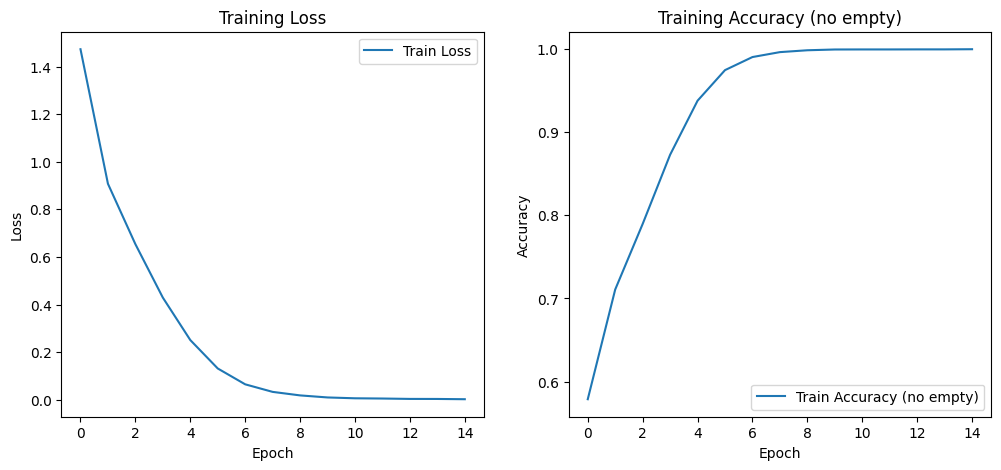

In [28]:
def train(
    model, dataloader, device, epochs=15,
    save_model=True, save_dir=None,
    plot_loss=True, lr=1e-4, weight_decay=1e-5
):
    # Move model to device
    model = model.to(device)

    # Optimizer (created after model is moved to device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Loss function that ignores empty squares
    criterion = torch.nn.CrossEntropyLoss(ignore_index=12)

    model.train()
    epoch_losses = []
    epoch_accuracies = []

    if save_model:
        assert save_dir is not None, "Please provide a save_dir to save model checkpoints."
        os.makedirs(save_dir, exist_ok=True)

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (images, labels) in enumerate(dataloader):
            images = images.to(device)
            labels = labels.long().to(device)

            optimizer.zero_grad()
            outputs = model(images)  # (B, 64, 13)

            loss = criterion(outputs.reshape(-1, 13), labels.reshape(-1))
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Accuracy (ignoring empty squares)
            preds = outputs.argmax(dim=2)  # (B, 64)
            mask = labels != 12
            correct += ((preds == labels) & mask).sum().item()
            total += mask.sum().item()

        avg_loss = running_loss / len(dataloader)
        accuracy = correct / total if total > 0 else 0.0

        epoch_losses.append(avg_loss)
        epoch_accuracies.append(accuracy)

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy (no empty): {accuracy:.4f}")

        if save_model:
            save_path = os.path.join(save_dir, f"chess_classifier_epoch{epoch+1}.pth")
            torch.save(model.state_dict(), save_path)
            print(f"✅ Saved model to {save_path}")

    if plot_loss:
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(epoch_losses, label='Train Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(epoch_accuracies, label='Train Accuracy (no empty)')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Training Accuracy (no empty)')
        plt.legend()

        plt.show()
model = ChessPieceClassifier(num_classes=13)
train(
    model=model,
    dataloader=loader,
    device=device,
    epochs=15,
    save_model=True,
    save_dir="/content/drive/MyDrive/Colab Notebooks/APS360/Project/models",
    plot_loss=True
)


In [29]:
# SAVE MODEL WITH 100% ACCURACY

save_path = "/content/drive/MyDrive/Colab Notebooks/APS360/Project/models/chess_classifier_v1.pth"

# Save model parameters (state_dict)
torch.save(model.state_dict(), save_path)

print(f"✅ Model saved to: {save_path}")


✅ Model saved to: /content/drive/MyDrive/Colab Notebooks/APS360/Project/models/chess_classifier_v1.pth


In [30]:
def visualize_predictions(model, dataloader, device, num_batches=1):
    model.eval()
    model.to(device)

    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(dataloader):
            if batch_idx >= num_batches:
                break

            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)  # (B, 64, 13)
            preds = outputs.argmax(dim=2)  # (B, 64)

            for i in range(min(3, images.size(0))):  # Show up to 3 boards
                print(f"\n🔍 Sample {i+1}")

                gt = labels[i].cpu().numpy()
                pr = preds[i].cpu().numpy()

                # Format as 8x8 boards
                gt_board = gt.reshape(8, 8)
                pr_board = pr.reshape(8, 8)

                print("🟩 Ground Truth:")
                print(gt_board)

                print("🟦 Prediction:")
                print(pr_board)

                mismatches = (gt_board != pr_board) & (gt_board != 12)
                print(f"❌ Mismatched squares (excluding empty): {mismatches.sum()}")
model = ChessPieceClassifier(num_classes=13)
model.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/APS360/Project/models/chess_classifier_epoch15.pth"))
visualize_predictions(model, loader, device, num_batches=1)



🔍 Sample 1
🟩 Ground Truth:
[[12 12 12  7 12 12 12 12]
 [12 12 11 12 12  6 12  6]
 [12 12 12 12  6 12 12 12]
 [ 6  0 12 12  8 12 12 12]
 [ 1 12 12 12  3 12  7 12]
 [12 12 12 12  0 12  0 12]
 [12 12  0 12  5 12 12  0]
 [ 1 12 12 12 12 12 12 12]]
🟦 Prediction:
[[ 7  4 11  7 11 11 11  1]
 [ 6 11 11 11  6  6  6  6]
 [ 1  6  6  6  6  6  7  1]
 [ 6  0  6  8  8  6  7  4]
 [ 1  1  0  3  3  3  7  7]
 [ 1  0 10  3  0  0  0  0]
 [ 0  1  0  2  5  0  0  0]
 [ 1  1  3  2  5  3  5  1]]
❌ Mismatched squares (excluding empty): 0

🔍 Sample 2
🟩 Ground Truth:
[[12 12 12  7 12 12 11 12]
 [12  6 10 12 12 12  9  6]
 [12  8 12 12 12 12  6 12]
 [ 6 12 12 12  6  6 12 12]
 [12 12  0  6 12 12 12 12]
 [12  0 12  1 12  0 12  0]
 [12 12 12 12 12 12  0 12]
 [12 12  3  1  4 12  5 12]]
🟦 Prediction:
[[ 7  8  7  7  7  7 11 11]
 [ 6  6 10  7 11  6  9  6]
 [ 6  8  9  6  6  6  6  6]
 [ 6  8  6  6  6  6  6  6]
 [ 0  0  0  6  6  6  3  3]
 [ 0  0  0  1  3  0  0  0]
 [ 0  0  0  1  3  0  0  0]
 [ 1  1  3  1  4  1  5  5]]
❌ Mism

In [40]:
# GET VALIDATION SET DATA

import os
from google.colab import drive

# Create save directory if it doesn't exist
save_dir = "/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation"
os.makedirs(save_dir, exist_ok=True)

X_validation = []  # Paths to warped images
y_validation = []  # Labels (4 FEN rotations each)

valid_ids_validation = []
error_ids_validation = []
invalid_warp_ids_validation = []

train_chessred2k_ids_validation = annotations['splits']['chessred2k']['val']['image_ids']

count=0
for i in train_chessred2k_ids_validation:
    path = image_id_to_path.get(i)
    if path is None:
        error_ids.append(i)
        continue

    try:
        warped, _ = preprocess_chessboard(path, display=False)
        if warped is None or np.std(warped) < 50:
            invalid_warp_ids_validation.append(i)
            continue

        # Save warped image
        img_save_path = os.path.join(save_dir, f"{i}.png")
        cv2.imwrite(img_save_path, warped)

        # Get 4 FEN rotations
        pieces = image_to_pieces[i]
        fen = pieces_to_fen(pieces)
        # fen0 = fen
        # fen90 = rotate_fen_90(fen)
        # fen180 = rotate_fen_180(fen)
        # fen270 = rotate_fen_270(fen)

        # label = [
        #     fen_to_label_vector(fen0),
        #     fen_to_label_vector(fen90),
        #     fen_to_label_vector(fen180),
        #     fen_to_label_vector(fen270)
        # ]

        X_validation.append(img_save_path)
        y_validation.append(fen)
        valid_ids_validation.append(i)

    except Exception as e:
        print(f"Error processing image {i}: {e}")
        error_ids_validation.append(i)

with open("/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped_dataset_validation.pkl", "wb") as f:
  pickle.dump((X_validation, y_validation), f)

print("✅ Total valid images:", len(valid_ids_validation))
print("❌ Total errors:", len(error_ids_validation))
print("⚠️ Total invalid warped:", len(invalid_warp_ids_validation))


Error processing image 802: cannot unpack non-iterable NoneType object
Error processing image 804: cannot unpack non-iterable NoneType object
Error processing image 806: cannot unpack non-iterable NoneType object
Error processing image 818: cannot unpack non-iterable NoneType object
Error processing image 823: cannot unpack non-iterable NoneType object
Error processing image 825: cannot unpack non-iterable NoneType object
Error processing image 826: cannot unpack non-iterable NoneType object
Error processing image 831: cannot unpack non-iterable NoneType object
Error processing image 832: cannot unpack non-iterable NoneType object
Error processing image 837: cannot unpack non-iterable NoneType object
Error processing image 839: cannot unpack non-iterable NoneType object
Error processing image 845: cannot unpack non-iterable NoneType object
Error processing image 846: cannot unpack non-iterable NoneType object
Error processing image 852: cannot unpack non-iterable NoneType object
Error 

In [41]:
import pickle

with open("/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped_dataset_validation.pkl", 'rb') as f:
    X_loaded, y_loaded = pickle.load(f)
print(X_loaded)
print(y_loaded)
data_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Recreate Dataset and DataLoader
dataset = ChessboardDataset(X_loaded, y_loaded, transform=data_transform)
loader = DataLoader(dataset, batch_size=16, shuffle=True)



['/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/792.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/794.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/795.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/796.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/799.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/805.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/808.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/812.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/815.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/816.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/819.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/8

In [42]:
def evaluate(model, dataloader, device):
    model.eval()
    criterion = torch.nn.CrossEntropyLoss(ignore_index=12)

    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.long().to(device)

            outputs = model(images)  # (B, 64, 13)
            loss = criterion(outputs.reshape(-1, 13), labels.reshape(-1))
            total_loss += loss.item()

            preds = outputs.argmax(dim=2)
            mask = labels != 12
            correct += ((preds == labels) & mask).sum().item()
            total += mask.sum().item()

    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total if total > 0 else 0.0

    print(f"📊 Validation Loss: {avg_loss:.4f}, Accuracy (no empty): {accuracy:.4f}")
    return avg_loss, accuracy


In [48]:
evaluate(model, loader, device)

📊 Validation Loss: 2.1887, Accuracy (no empty): 0.6277


(2.1886563658714295, 0.6276595744680851)

NEW TRAINING FUNCIONT THAT DOES NOT IGNORE BLANK SQUARES

Epoch [1/15], Loss: 2.2790, Accuracy (all): 0.3182, Accuracy (no empty): 0.2794
✅ Saved model to /content/drive/MyDrive/Colab Notebooks/APS360/Project/models/chess_classifier_epoch1.pth
Epoch [2/15], Loss: 1.5420, Accuracy (all): 0.6986, Accuracy (no empty): 0.3751
✅ Saved model to /content/drive/MyDrive/Colab Notebooks/APS360/Project/models/chess_classifier_epoch2.pth
Epoch [3/15], Loss: 1.2238, Accuracy (all): 0.7478, Accuracy (no empty): 0.3909
✅ Saved model to /content/drive/MyDrive/Colab Notebooks/APS360/Project/models/chess_classifier_epoch3.pth
Epoch [4/15], Loss: 1.0394, Accuracy (all): 0.7844, Accuracy (no empty): 0.4484
✅ Saved model to /content/drive/MyDrive/Colab Notebooks/APS360/Project/models/chess_classifier_epoch4.pth
Epoch [5/15], Loss: 0.8991, Accuracy (all): 0.7979, Accuracy (no empty): 0.5493
✅ Saved model to /content/drive/MyDrive/Colab Notebooks/APS360/Project/models/chess_classifier_epoch5.pth
Epoch [6/15], Loss: 0.7771, Accuracy (all): 0.8248, Accuracy (no empty

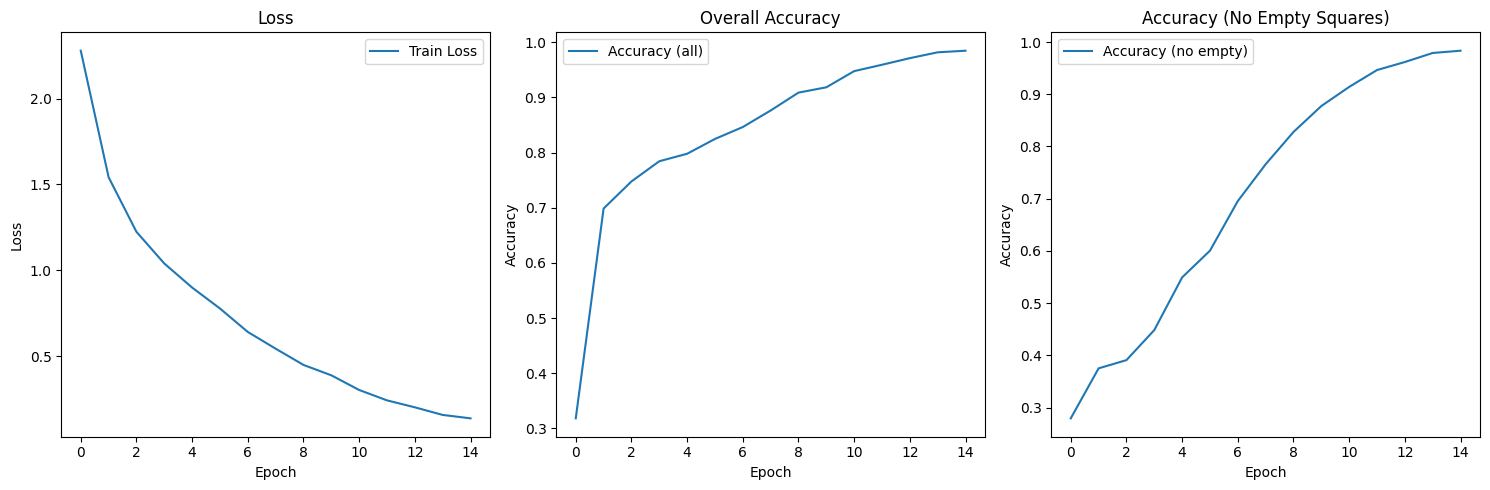


🔍 Sample 1
🟩 Ground Truth:
[[ 7 12 12 10 12  7 11 12]
 [12 12 12 12 12  6  8 12]
 [ 9  6 12 12 12 12  6  6]
 [ 6 12  6  0  2 12 12 12]
 [12 12 12 12  0  0  0 12]
 [ 0 12 12 12 12 12 12  0]
 [12 12  4 12 12 12  3 12]
 [12 12 12  1 12  1  5 12]]
🟦 Prediction:
[[ 7 12 12 10 12  7 11 12]
 [12 12 12 12 12  6  8 12]
 [ 9  6 12 12 12 12  6  6]
 [ 6 12  6  0  2 12 12 12]
 [12 12 12 12  0  0  0 12]
 [ 0 12 12 12 12 12 12  0]
 [12 12  4 12 12 12  3 12]
 [12 12 12  1 12  1  5 12]]
❌ Mismatched squares (excluding empty): 0

🔍 Sample 2
🟩 Ground Truth:
[[12 12 12 12 12 12 12 12]
 [12 12 12 12 12 12 12 12]
 [12  0 12 12 12 12 12 12]
 [12 12  5 12 12  7 12 12]
 [12 12 12 12 12 12 12 12]
 [12 12 12 12 12 12 12 12]
 [12 12 12 12 12 12 11  6]
 [ 1 12 12 12 12 12 12 12]]
🟦 Prediction:
[[12 12 12 12 12 12 12 12]
 [12 12 12 12 12 12 12 12]
 [12  0 12 12 12 12 12 12]
 [12 12  5 12 12  7 12 12]
 [12 12 12 12 12 12 12 12]
 [12 12 12 12 12 12 12 12]
 [12 12 12 12 12 12 11  6]
 [ 1 12 12 12 12 12 12 12]]
❌ Mism

In [54]:
def train(
    model, dataloader, device, epochs=15,
    save_model=True, save_dir=None,
    plot_loss=True, lr=1e-4, weight_decay=1e-5,
    empty_class_idx=12, empty_class_weight=0.3
):
    model = model.to(device)
    model.train()

    # Class weights: reduce weight for empty squares (class 12)
    weights = torch.ones(13)
    weights[empty_class_idx] = empty_class_weight
    weights = weights.to(device)

    criterion = nn.CrossEntropyLoss(weight=weights)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    epoch_losses = []
    epoch_accs_all = []       # Accuracy including empty
    epoch_accs_no_empty = []  # Accuracy excluding empty

    if save_model:
        assert save_dir is not None, "Please provide a save_dir to save model checkpoints."
        os.makedirs(save_dir, exist_ok=True)

    for epoch in range(epochs):
        model.train()

        running_loss = 0.0
        correct_all = 0
        total_all = 0
        correct_non_empty = 0
        total_non_empty = 0

        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.long().to(device)

            optimizer.zero_grad()
            outputs = model(images)  # (B, 64, 13)
            loss = criterion(outputs.reshape(-1, 13), labels.reshape(-1))

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            preds = outputs.argmax(dim=2)  # (B, 64)

            # Accuracy including all squares
            correct_all += (preds == labels).sum().item()
            total_all += labels.numel()

            # Accuracy excluding empty squares
            mask = labels != empty_class_idx
            correct_non_empty += ((preds == labels) & mask).sum().item()
            total_non_empty += mask.sum().item()

        avg_loss = running_loss / len(dataloader)
        acc_all = correct_all / total_all
        acc_no_empty = correct_non_empty / total_non_empty if total_non_empty > 0 else 0.0

        epoch_losses.append(avg_loss)
        epoch_accs_all.append(acc_all)
        epoch_accs_no_empty.append(acc_no_empty)

        print(f"Epoch [{epoch+1}/{epochs}], "
              f"Loss: {avg_loss:.4f}, "
              f"Accuracy (all): {acc_all:.4f}, "
              f"Accuracy (no empty): {acc_no_empty:.4f}")

        if save_model:
            save_path = os.path.join(save_dir, f"chess_classifier_epoch{epoch+1}.pth")
            torch.save(model.state_dict(), save_path)
            print(f"✅ Saved model to {save_path}")

    if plot_loss:
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.plot(epoch_losses, label='Train Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss')
        plt.legend()

        plt.subplot(1, 3, 2)
        plt.plot(epoch_accs_all, label='Accuracy (all)')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Overall Accuracy')
        plt.legend()

        plt.subplot(1, 3, 3)
        plt.plot(epoch_accs_no_empty, label='Accuracy (no empty)')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Accuracy (No Empty Squares)')
        plt.legend()

        plt.tight_layout()
        plt.show()
model = ChessPieceClassifier(num_classes=13)

train(
    model=model,
    dataloader=loader,
    device=device,
    epochs=15,
    save_model=True,
    save_dir="/content/drive/MyDrive/Colab Notebooks/APS360/Project/models",
    plot_loss=True,
    empty_class_weight=0.3  # You can tune this value (e.g. 0.1, 0.5, etc.)
)
model = ChessPieceClassifier(num_classes=13)
model.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/APS360/Project/models/chess_classifier_epoch15.pth"))
visualize_predictions(model, loader, device, num_batches=1)



In [56]:
# NOW TEST THIS NEW MODEL WITH VAL DATA

import pickle

with open("/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped_dataset_validation.pkl", 'rb') as f:
    X_loaded, y_loaded = pickle.load(f)
print(X_loaded)
print(y_loaded)
data_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Recreate Dataset and DataLoader
dataset = ChessboardDataset(X_loaded, y_loaded, transform=data_transform)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

def evaluate_new_model(model, dataloader, device, empty_class_idx=12):
    model.eval()
    criterion = torch.nn.CrossEntropyLoss()  # No ignore_index

    total_loss = 0.0
    correct_all = 0
    correct_non_empty = 0
    total_all = 0
    total_non_empty = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.long().to(device)

            outputs = model(images)  # (B, 64, 13)
            loss = criterion(outputs.reshape(-1, 13), labels.reshape(-1))
            total_loss += loss.item()

            preds = outputs.argmax(dim=2)  # (B, 64)

            # Accuracy on all squares
            correct_all += (preds == labels).sum().item()
            total_all += labels.numel()

            # Accuracy on non-empty squares
            mask = labels != empty_class_idx
            correct_non_empty += ((preds == labels) & mask).sum().item()
            total_non_empty += mask.sum().item()

    avg_loss = total_loss / len(dataloader)
    accuracy_all = correct_all / total_all if total_all > 0 else 0.0
    accuracy_non_empty = correct_non_empty / total_non_empty if total_non_empty > 0 else 0.0

    print(f"📊 Validation Loss: {avg_loss:.4f}, Accuracy (all): {accuracy_all:.4f}, Accuracy (no empty): {accuracy_non_empty:.4f}")
    return avg_loss, accuracy_all, accuracy_non_empty


evaluate_new_model(model, loader, device)

['/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/792.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/794.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/795.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/796.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/799.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/805.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/808.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/812.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/815.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/816.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/819.png', '/content/drive/MyDrive/Colab Notebooks/APS360/Project/warped2_validation/8

(0.09088337272405625, 0.9897260273972602, 0.9913317572892041)

In [72]:
def show_misclassified_predictions(model, dataloader, device, max_errors=5):
    model.eval()
    model.to(device)
    shown = 0

    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(dataloader):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)  # (B, 64, 13)
            preds = outputs.argmax(dim=2)

            for i in range(images.size(0)):
                gt = labels[i].cpu().numpy().reshape(8, 8)
                pr = preds[i].cpu().numpy().reshape(8, 8)

                # Identify mismatches (excluding empty squares if needed)
                mismatches = (gt != pr)
                mismatches_count = np.sum(mismatches)


                if mismatches_count > 0:
                    shown += 1
                    print(f"\n🔍 Sample {shown}")
                    print("🟩 Ground Truth:")
                    print(gt)
                    print("🟦 Prediction:")
                    print(pr)
                    print(f"❌ Mismatched squares: {mismatches_count}")

                    if shown >= max_errors:
                        return
show_misclassified_predictions(model, loader, device, max_errors=3)



🔍 Sample 1
🟩 Ground Truth:
[[12 11 12  7 12  9 12  7]
 [12  6  6 10 12  6 12 12]
 [ 6 12  8 12  9 12  6  6]
 [12 12 12  6  0 12 12 12]
 [12 12 12 12 12  3 12  0]
 [12 12  0  3 12  2  4 12]
 [ 0  0  0 12 12 12  0 12]
 [12  5 12  1 12 12 12  1]]
🟦 Prediction:
[[12 11  7  7 12  9 12  7]
 [12  6  6 10 12  6 12 12]
 [ 6 12  8 12  9 12  6  6]
 [12 12 12  6  0 12 12 12]
 [12 12 12 12 12  3 12  0]
 [12 12  0  3 12  2  4 12]
 [ 0  0  0 12 12 12  0 12]
 [12  5 12  1 12 12 12  1]]
❌ Mismatched squares: 1

🔍 Sample 2
🟩 Ground Truth:
[[ 7 12 12 10 11  9 12  7]
 [ 6  6  6 12 12  6  6  6]
 [12 12  8 12  9 12 12 12]
 [12 12 12  6  0 12 12 12]
 [12 12 12 12 12  3 12 12]
 [12 12  0 12 12  4 12 12]
 [ 0  0  0 12 12 12  0  0]
 [12 12  5  1 12  3  2  1]]
🟦 Prediction:
[[ 7 12 12 10 11  9 12  7]
 [ 6  6  6 12 12  6  6  6]
 [12 12  8 12  9 12 12 12]
 [12 12 12  6  0 12 12 12]
 [12 12 12 12 12  3 12 12]
 [12 12  0 12 12  4 12 12]
 [ 0  0  0 12 12 12  0  0]
 [12  5  5  1  1  3  2  1]]
❌ Mismatched squares: 2
